In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:

ce5 = pd.read_csv('../data/slurm_wrapper_ce5.log',
                  header=None,
                  delimiter=' - ',
                  engine='python')

ce5.head()

,0,1,2,3,4,5
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '..."


In [3]:
ce5['loggedtime']= ce5[0].apply(lambda x : x[:19])
ce5['jobname'] = ce5[5].apply(lambda x : x[10:-1].split(',')[0].replace("'", "").strip().split('/')[3])
ce5['respoonseTime'] = ce5[3].apply(lambda x : x.split('.')[0][5:])
ce5['user'] = ce5[1].apply(lambda x : x[5:])
ce5['retry']= ce5[2].apply(lambda x : x[6:])
ce5['returncode']= ce5[4].apply(lambda x : x[11:])

In [4]:
#cleaned frame
ce5.head()

,0,1,2,3,4,5,loggedtime,jobname,respoonseTime,user,retry,returncode
0,2020-10-16 08:15:39.278699,user 0,retry 0,time 0.07347559928894043,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:15:39,sacct,0,0,0,0
1,2020-10-16 08:18:08.313309,user 0,retry 0,time 0.18363237380981445,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:18:08,sacct,0,0,0,0
2,2020-10-16 08:22:48.128689,user 0,retry 0,time 0.07547116279602051,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:22:48,sacct,0,0,0,0
3,2020-10-16 08:25:13.257408,user 0,retry 0,time 0.09484362602233887,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:25:13,sacct,0,0,0,0
4,2020-10-16 08:31:01.460723,user 0,retry 0,time 0.07498788833618164,returncode 0,"command ['/usr/bin/sacct', '-u', 'appelte1', '...",2020-10-16 08:31:01,sacct,0,0,0,0


In [5]:
#Lets grab the cleaned columns.
ce5log_df = ce5.reindex(columns = ['loggedtime','user','jobname','respoonseTime','returncode','retry'])

In [6]:
#ce5log_date_returncode_group_df=ce5log_df.groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','returncode']]
#ce5log_date_returncode_group_df

In [7]:
#lets convert the log time to date time so that we can sort to see the pattern
#ce5log_date_returncode_group_df['loggedtime'] = pd.to_datetime(ce5log_date_returncode_group_df['loggedtime'],errors='coerce')
#ce5log_date_returncode_group_df

In [8]:
#ce5log_date_returncode_group_df['date'] = ce5log_date_returncode_group_df['loggedtime'].dt.date
#ce5log_date_returncode_group_df['returncode'] = ce5log_date_returncode_group_df['returncode'].astype('int')
#ce5log_date_returncode_group_df

In [9]:
# ce5log_date_returncode_group_df['modReturnCode'] = ce5log_date_returncode_group_df['returncode'].apply(
#     lambda x : 0 if x != 0 and x!= 1 else x
# )
# ce5log_date_returncode_group_df

In [10]:
#ce5log_date_returncode_group_df['date'] = pd.to_datetime(
#    ce5log_date_returncode_group_df['date']
#)
#ce5log_date_returncode_group_df

In [11]:
#checkdf = ce5log_date_returncode_group_df[(
#    (ce5log_date_returncode_group_df['loggedtime'] >= '2021-08-01 06:48:00')
#    &
#    (ce5log_date_returncode_group_df['loggedtime'] <= '2021-08-31 06:48:49')
#)]
#checkdf

In [12]:
#checkdf['returncode'].unique()

In [13]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates


# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(checkdf['loggedtime'], checkdf['returncode'])
# plt.xlabel('Time')
# plt.ylabel('counts')
# plt.title('Data')

# # Format the x-axis for hourly data
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## below is specific to batch type

In [14]:
ce5log_df_sbatch = ce5log_df[ce5log_df['jobname'] == 'sbatch']

In [15]:
ce5log_df_sbatch

,loggedtime,user,jobname,respoonseTime,returncode,retry
29,2020-10-16 08:32:25,9201,sbatch,0,0,0
30,2020-10-16 08:32:25,9201,sbatch,0,0,0
34,2020-10-16 08:32:53,9201,sbatch,0,0,0
35,2020-10-16 08:32:53,9201,sbatch,0,0,0
36,2020-10-16 08:32:53,9201,sbatch,0,0,0
...,...,...,...,...,...,...
4770843,2021-10-07 21:44:59,9204,sbatch,0,0,0
4770868,2021-10-07 21:53:47,9204,sbatch,0,0,0
4770871,2021-10-07 21:54:51,9203,sbatch,0,0,0
4770873,2021-10-07 21:55:01,9203,sbatch,0,0,0


In [16]:
#look for return code = 1 to see non-response from server, find timestamp of having more non-responses
ce5log_sbatch_date_returncode_group_df=ce5log_df_sbatch[(ce5log_df_sbatch['returncode'].astype('int') == 1) & (ce5log_df_sbatch['respoonseTime'].astype('int') > 15) ].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce5log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
19894,2021-09-24 19:13:14,1
19895,2021-09-24 20:16:31,1
19896,2021-10-02 08:14:16,1
19897,2021-10-02 17:28:16,1


In [17]:
#lets convert the log time to date time so that we can sort to see the pattern
ce5log_sbatch_date_returncode_group_df['loggedtime'] = pd.to_datetime(
    ce5log_sbatch_date_returncode_group_df['loggedtime'],
    errors='coerce'
)
ce5log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
19894,2021-09-24 19:13:14,1
19895,2021-09-24 20:16:31,1
19896,2021-10-02 08:14:16,1
19897,2021-10-02 17:28:16,1


In [18]:
#lets sort the date and time for further processing , also rename the user column to count
ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.sort_values(by=['loggedtime','count'],ascending=[True,True])
ce5log_sbatch_date_returncode_group_df
#ce5log_sbatch_date_returncode_group_df= ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
#ce5log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:45,3
1,2020-10-16 11:43:46,2
2,2020-10-16 11:43:54,1
3,2020-10-16 22:21:13,1
4,2020-10-16 22:21:33,1
...,...,...
19894,2021-09-24 19:13:14,1
19895,2021-09-24 20:16:31,1
19896,2021-10-02 08:14:16,1
19897,2021-10-02 17:28:16,1


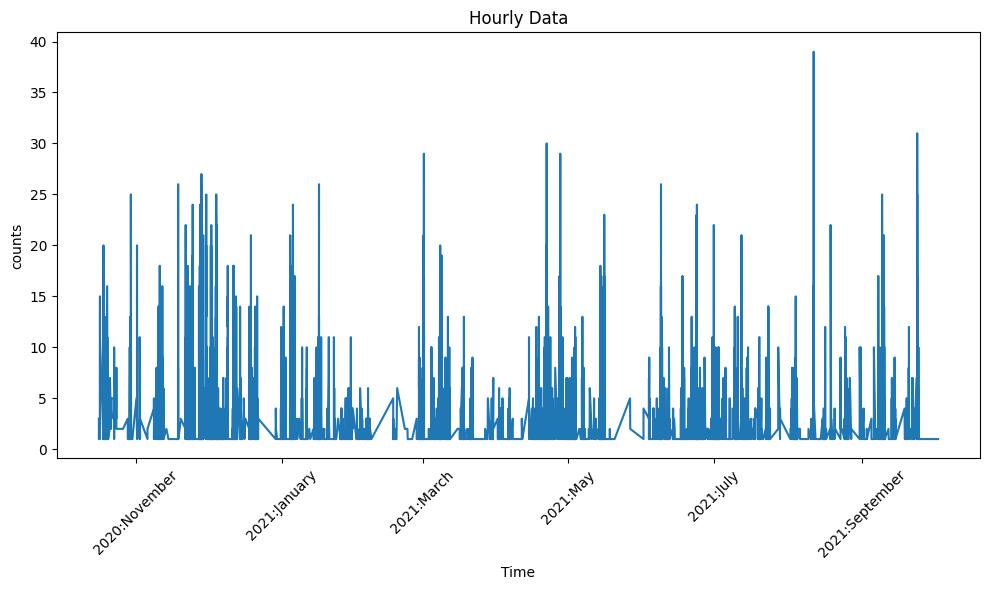

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ce5log_sbatch_date_returncode_group_df['loggedtime'], ce5log_sbatch_date_returncode_group_df['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Hourly Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y:%B'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
oct2020= ce5log_sbatch_date_returncode_group_df[(
    ce5log_sbatch_date_returncode_group_df['loggedtime'] >= '2021-08-11'
) & (ce5log_sbatch_date_returncode_group_df['loggedtime'] <= '2021-08-12'
)]
oct2020

,loggedtime,count
18848,2021-08-11 10:28:19,1
18849,2021-08-11 12:56:55,2
18850,2021-08-11 13:10:37,1
18851,2021-08-11 13:10:38,6
18852,2021-08-11 13:10:39,6
...,...,...
18926,2021-08-11 17:05:07,10
18927,2021-08-11 17:05:08,1
18928,2021-08-11 17:05:09,3
18929,2021-08-11 17:05:10,9


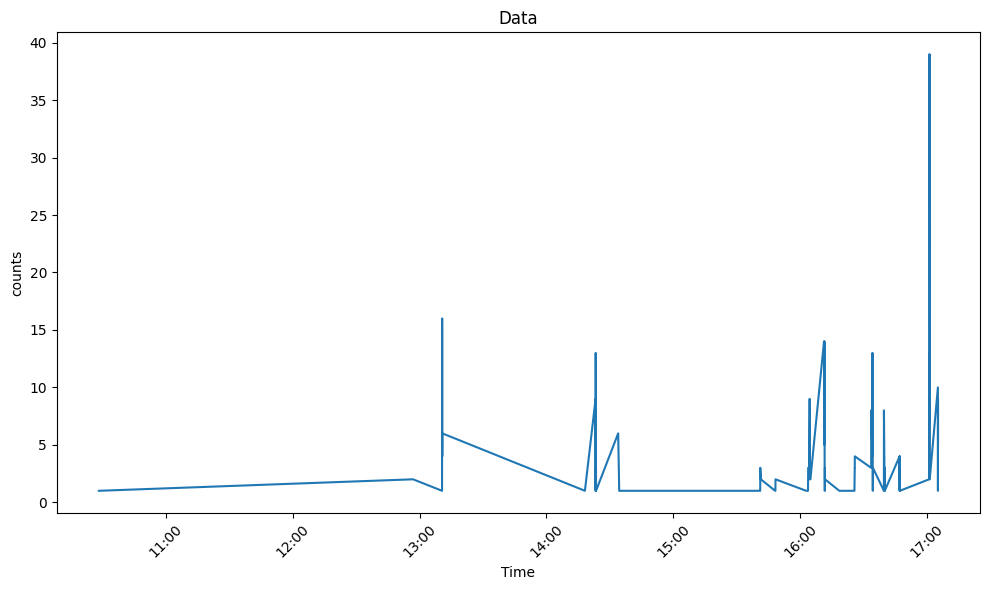

In [21]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(oct2020['loggedtime'], oct2020['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
#since there are more records given time, lets shrink it and limit to Date ,HH and MM by grouping by loggedtime
ce5log_sbatch_date_returncode_group_df['dateHHMM'] = pd.to_datetime(ce5log_sbatch_date_returncode_group_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))
ce5log_sbatch_date_returncode_group_df

,loggedtime,count,dateHHMM
0,2020-10-16 11:43:45,3,2020-10-16 11:43:00
1,2020-10-16 11:43:46,2,2020-10-16 11:43:00
2,2020-10-16 11:43:54,1,2020-10-16 11:43:00
3,2020-10-16 22:21:13,1,2020-10-16 22:21:00
4,2020-10-16 22:21:33,1,2020-10-16 22:21:00
...,...,...,...
19894,2021-09-24 19:13:14,1,2021-09-24 19:13:00
19895,2021-09-24 20:16:31,1,2021-09-24 20:16:00
19896,2021-10-02 08:14:16,1,2021-10-02 08:14:00
19897,2021-10-02 17:28:16,1,2021-10-02 17:28:00


In [23]:
#Now lets do the count per Date,HH and MM
batchHHMM_df = ce5log_sbatch_date_returncode_group_df[['dateHHMM','count']].groupby('dateHHMM').sum('count').reset_index()
batchHHMM_df.head()

,dateHHMM,count
0,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,9
3,2020-10-16 22:26:00,5
4,2020-10-16 22:33:00,21


In [24]:
#Lets check some sample date ranges
checkdf = batchHHMM_df[(
    (batchHHMM_df['dateHHMM'] >= '2020-12-04 00:00:00')
    &
    (batchHHMM_df['dateHHMM'] <= '2020-12-05 23:55:00')
)]
checkdf

,dateHHMM,count
1814,2020-12-04 05:22:00,5
1815,2020-12-04 05:23:00,5
1816,2020-12-04 09:46:00,3
1817,2020-12-04 09:47:00,3
1818,2020-12-04 10:00:00,1
...,...,...
2149,2020-12-05 22:49:00,1
2150,2020-12-05 22:55:00,2
2151,2020-12-05 22:56:00,2
2152,2020-12-05 23:06:00,1


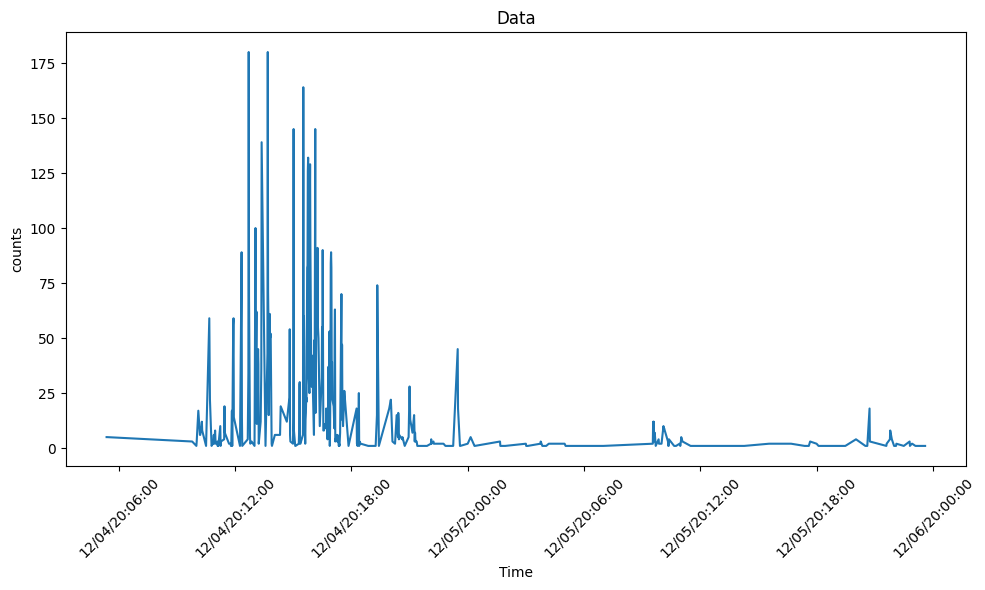

In [25]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lets calculate the return coode 0 successful processing.. 

In [26]:
#look for return code = 0 to see non-response from server, find timestamp of having more non-responses
ce5log_sbatch_zero_df=ce5log_df_sbatch[ce5log_df_sbatch['returncode'].astype('int') == 0].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
#ce5log_sbatch_date_returncode_group_df = ce5log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})

#lets convert the log time to date time so that we can sort to see the pattern
ce5log_sbatch_zero_df['loggedtime'] = pd.to_datetime(
    ce5log_sbatch_zero_df['loggedtime'],
    errors='coerce'
)

ce5log_sbatch_zero_df = ce5log_sbatch_zero_df.sort_values(by=['loggedtime','user'],ascending=[True,True])
ce5log_sbatch_zero_df=ce5log_sbatch_zero_df.rename(columns={'user':'countZero'})
ce5log_sbatch_zero_df['dateHHMMzero'] = pd.to_datetime(ce5log_sbatch_zero_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))
ce5log_sbatch_zero_df

,loggedtime,countZero,dateHHMMzero
0,2020-10-16 08:32:25,2,2020-10-16 08:32:00
1,2020-10-16 08:32:53,8,2020-10-16 08:32:00
2,2020-10-16 08:33:03,15,2020-10-16 08:33:00
3,2020-10-16 08:33:04,3,2020-10-16 08:33:00
4,2020-10-16 08:33:06,5,2020-10-16 08:33:00
...,...,...,...
303315,2021-10-07 21:44:59,1,2021-10-07 21:44:00
303316,2021-10-07 21:53:47,1,2021-10-07 21:53:00
303317,2021-10-07 21:54:51,1,2021-10-07 21:54:00
303318,2021-10-07 21:55:01,1,2021-10-07 21:55:00


In [27]:
batchHHMM_zero_df = ce5log_sbatch_zero_df[['dateHHMMzero','countZero']].groupby('dateHHMMzero').sum('countZero').reset_index()
batchHHMM_zero_df.head()

,dateHHMMzero,countZero
0,2020-10-16 08:32:00,10
1,2020-10-16 08:33:00,35
2,2020-10-16 08:34:00,45
3,2020-10-16 08:36:00,3
4,2020-10-16 08:37:00,29


In [28]:
#Lets now see the return code 1 and returncode 0 comparision for specific date
checkdf = batchHHMM_df[(
    (batchHHMM_df['dateHHMM'] >= '2020-12-01 23:00:00')
    &
    (batchHHMM_df['dateHHMM'] <= '2020-12-02 00:15:00')
)]
checkdf.head()

,dateHHMM,count


In [29]:
checkdfzero = batchHHMM_zero_df[(
    (batchHHMM_zero_df['dateHHMMzero'] >= '2020-12-01 21:00:00')
    &
    (batchHHMM_zero_df['dateHHMMzero'] <= '2020-12-02 00:15:00')
)]
checkdfzero

,dateHHMMzero,countZero
32420,2020-12-01 21:00:00,1
32421,2020-12-01 21:01:00,4
32422,2020-12-01 21:07:00,6
32423,2020-12-01 21:08:00,4
32424,2020-12-01 21:09:00,2
...,...,...
32516,2020-12-02 00:09:00,6
32517,2020-12-02 00:12:00,1
32518,2020-12-02 00:13:00,3
32519,2020-12-02 00:14:00,24


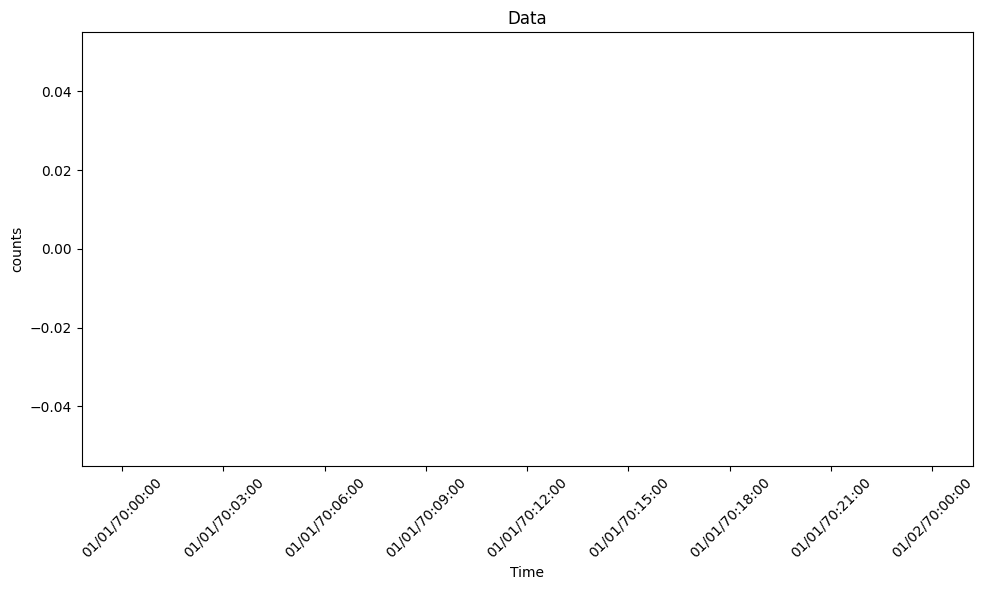

In [30]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

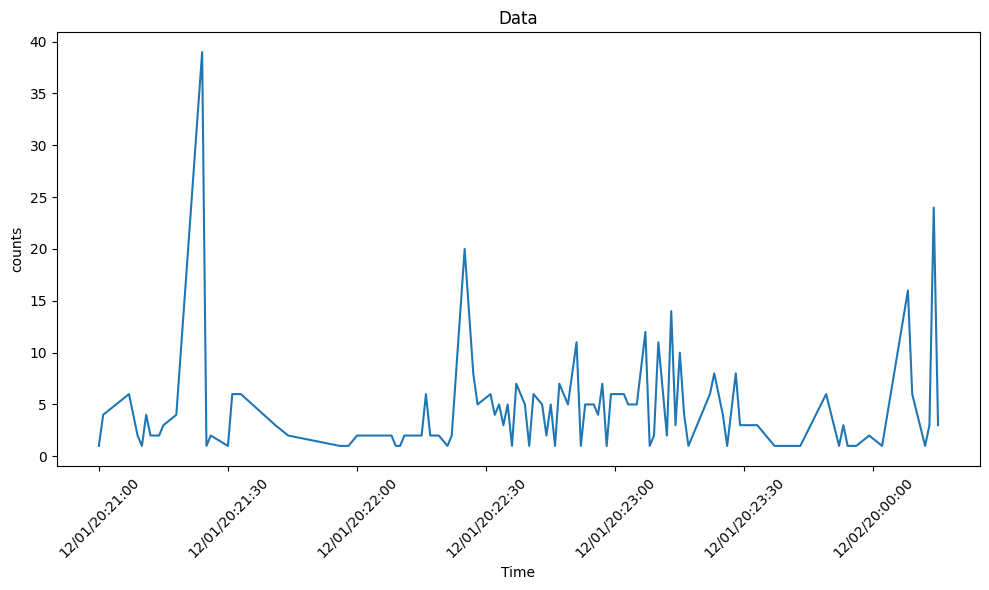

In [31]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdfzero['dateHHMMzero'], checkdfzero['countZero'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lets start ce6 log file processing

In [32]:
ce6 = pd.read_csv('../data/slurm_wrapper_ce6.log',
                  header=None,
                  delimiter=' - ',
                  engine='python')

ce6.head()

,0,1,2,3,4,5
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '..."


In [33]:
ce6['loggedtime']= ce6[0].apply(lambda x : x[:19])
ce6['jobname'] = ce6[5].apply(lambda x : x[10:-1].split(',')[0].replace("'", "").strip().split('/')[3])
ce6['respoonseTime'] = ce6[3].apply(lambda x : x.split('.')[0][5:])
ce6['user'] = ce6[1].apply(lambda x : x[5:])
ce6['retry']= ce6[2].apply(lambda x : x[6:])
ce6['returncode']= ce6[4].apply(lambda x : x[11:])

In [34]:
ce6.head()

,0,1,2,3,4,5,loggedtime,jobname,respoonseTime,user,retry,returncode
0,2020-10-16 10:37:44.163454,user 9202,retry 0,time 0.08495402336120605,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
1,2020-10-16 10:37:44.206654,user 9202,retry 0,time 0.08943057060241699,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
2,2020-10-16 10:37:44.218760,user 9202,retry 0,time 0.05928945541381836,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
3,2020-10-16 10:37:44.256403,user 9202,retry 0,time 0.038695573806762695,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0
4,2020-10-16 10:37:44.611603,user 9202,retry 0,time 0.03343677520751953,returncode 0,"command ['/usr/bin/scontrol', 'show', 'job', '...",2020-10-16 10:37:44,scontrol,0,9202,0,0


In [35]:
#Lets grab the cleaned columns.
ce6log_df = ce6.reindex(columns = ['loggedtime','user','jobname','respoonseTime','returncode','retry'])

In [36]:
#batch jobs
ce6log_df_sbatch = ce6log_df[ce6log_df['jobname'] == 'sbatch']
ce6log_df_sbatch

,loggedtime,user,jobname,respoonseTime,returncode,retry
13,2020-10-16 10:38:29,9204,sbatch,0,0,0
39,2020-10-16 10:41:08,9201,sbatch,0,0,0
40,2020-10-16 10:41:08,9201,sbatch,0,0,0
41,2020-10-16 10:41:08,9201,sbatch,0,0,0
50,2020-10-16 10:42:51,9201,sbatch,0,0,0
...,...,...,...,...,...,...
4776444,2021-10-07 21:39:15,9204,sbatch,0,0,0
4776494,2021-10-07 21:54:50,9203,sbatch,0,0,0
4776495,2021-10-07 21:54:50,9203,sbatch,0,0,0
4776496,2021-10-07 21:55:00,9203,sbatch,0,0,0


In [37]:
#look for return code = 1 to see non-response from server, find timestamp of having more non-responses
ce6log_sbatch_date_returncode_group_df=ce6log_df_sbatch[(ce6log_df_sbatch['returncode'].astype('int') == 1) & (ce6log_df_sbatch['respoonseTime'].astype('int') > 15) ].groupby(['loggedtime','returncode']).count().reset_index()[['loggedtime','user']]
ce6log_sbatch_date_returncode_group_df = ce6log_sbatch_date_returncode_group_df.rename(columns={'user':'count'})
ce6log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:49,1
1,2020-10-16 17:43:27,15
2,2020-10-16 22:21:26,2
3,2020-10-16 22:21:31,2
4,2020-10-16 22:21:46,2
...,...,...
16062,2021-10-02 16:01:45,1
16063,2021-10-02 17:48:34,1
16064,2021-10-02 18:08:41,1
16065,2021-10-02 18:18:44,2


In [38]:
#lets convert the log time to date time so that we can sort to see the pattern
ce6log_sbatch_date_returncode_group_df['loggedtime'] = pd.to_datetime(
    ce6log_sbatch_date_returncode_group_df['loggedtime'],
    errors='coerce'
)
ce6log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:49,1
1,2020-10-16 17:43:27,15
2,2020-10-16 22:21:26,2
3,2020-10-16 22:21:31,2
4,2020-10-16 22:21:46,2
...,...,...
16062,2021-10-02 16:01:45,1
16063,2021-10-02 17:48:34,1
16064,2021-10-02 18:08:41,1
16065,2021-10-02 18:18:44,2


In [39]:
#sort by date and rename 
ce6log_sbatch_date_returncode_group_df = ce6log_sbatch_date_returncode_group_df.sort_values(by=['loggedtime','count'],ascending=[True,True])
ce6log_sbatch_date_returncode_group_df

,loggedtime,count
0,2020-10-16 11:43:49,1
1,2020-10-16 17:43:27,15
2,2020-10-16 22:21:26,2
3,2020-10-16 22:21:31,2
4,2020-10-16 22:21:46,2
...,...,...
16062,2021-10-02 16:01:45,1
16063,2021-10-02 17:48:34,1
16064,2021-10-02 18:08:41,1
16065,2021-10-02 18:18:44,2


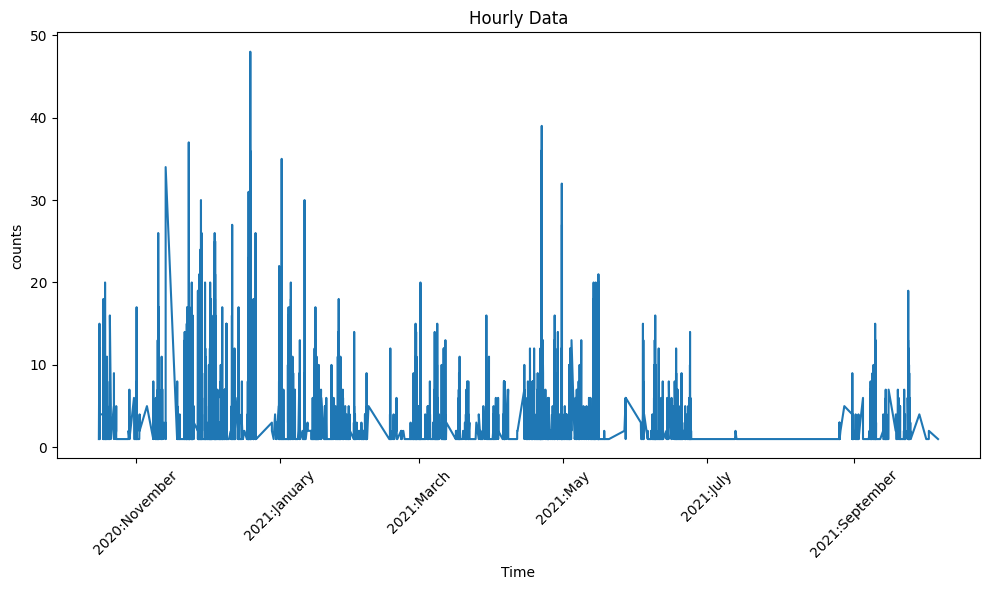

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ce6log_sbatch_date_returncode_group_df['loggedtime'], ce6log_sbatch_date_returncode_group_df['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Hourly Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y:%B'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
#Lets get the time in HHMM so that we can grab overlapping time failure
ce6log_sbatch_date_returncode_group_df['dateHHMM'] = pd.to_datetime(ce6log_sbatch_date_returncode_group_df['loggedtime'].dt.strftime('%Y-%m-%d %H:%M'))
ce6log_sbatch_date_returncode_group_df.head()

,loggedtime,count,dateHHMM
0,2020-10-16 11:43:49,1,2020-10-16 11:43:00
1,2020-10-16 17:43:27,15,2020-10-16 17:43:00
2,2020-10-16 22:21:26,2,2020-10-16 22:21:00
3,2020-10-16 22:21:31,2,2020-10-16 22:21:00
4,2020-10-16 22:21:46,2,2020-10-16 22:21:00


In [42]:
ce6batchHHMM_df = ce6log_sbatch_date_returncode_group_df[['dateHHMM','count']].groupby('dateHHMM').sum('count').reset_index()
ce6batchHHMM_df

,dateHHMM,count
0,2020-10-16 11:43:00,1
1,2020-10-16 17:43:00,15
2,2020-10-16 22:21:00,8
3,2020-10-16 22:31:00,16
4,2020-10-16 22:38:00,41
...,...,...
7509,2021-10-02 16:01:00,1
7510,2021-10-02 17:48:00,1
7511,2021-10-02 18:08:00,1
7512,2021-10-02 18:18:00,2


In [43]:
# # Plot the data
# plt.figure(figsize=(10, 6))
# plt.plot(ce6checkdf['dateHHMM'], ce6checkdf['count'])
# plt.xlabel('Time')
# plt.ylabel('counts')
# plt.title('Data')

# # Format the x-axis for hourly data
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
# #plt.gca().xaxis.set_major_locator(mdates.HourLocator())

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

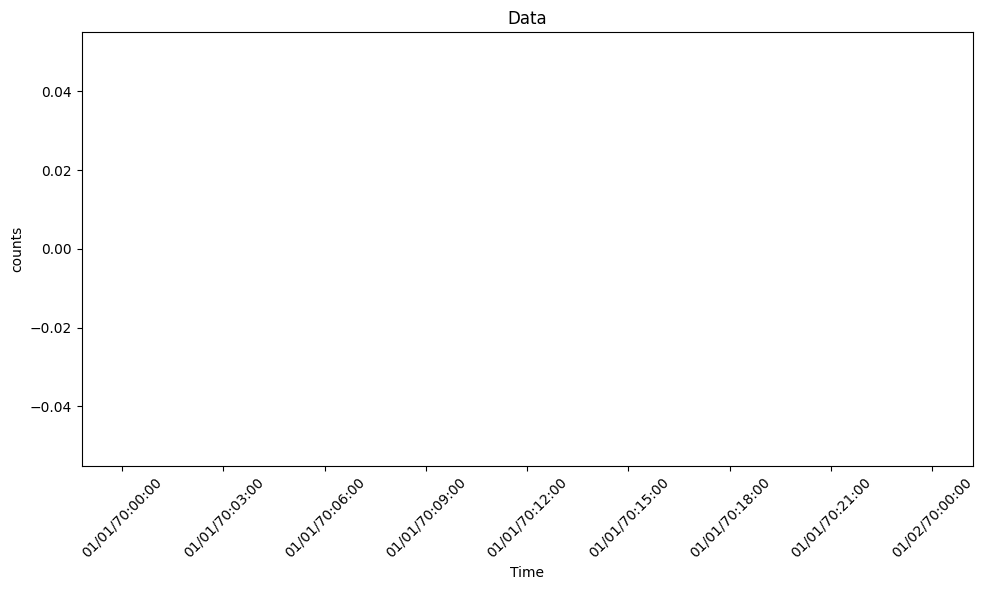

In [44]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(checkdf['dateHHMM'], checkdf['count'])
plt.xlabel('Time')
plt.ylabel('counts')
plt.title('Data')

# Format the x-axis for hourly data
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D:%H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
batchHHMM_df

,dateHHMM,count
0,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,9
3,2020-10-16 22:26:00,5
4,2020-10-16 22:33:00,21
...,...,...
8312,2021-09-24 19:13:00,1
8313,2021-09-24 20:16:00,1
8314,2021-10-02 08:14:00,1
8315,2021-10-02 17:28:00,1


In [46]:
ce6batchHHMM_df['c6yymm'] =ce6batchHHMM_df['dateHHMM'].dt.strftime('%Y-%m')

In [47]:
batchHHMM_df['c5yymm']  =batchHHMM_df['dateHHMM'].dt.strftime('%Y-%m')
batchHHMM_df.head()

,dateHHMM,count,c5yymm
0,2020-10-16 11:43:00,6,2020-10
1,2020-10-16 22:21:00,2,2020-10
2,2020-10-16 22:25:00,9,2020-10
3,2020-10-16 22:26:00,5,2020-10
4,2020-10-16 22:33:00,21,2020-10


In [48]:
ce6batchHHMM_df.head()

,dateHHMM,count,c6yymm
0,2020-10-16 11:43:00,1,2020-10
1,2020-10-16 17:43:00,15,2020-10
2,2020-10-16 22:21:00,8,2020-10
3,2020-10-16 22:31:00,16,2020-10
4,2020-10-16 22:38:00,41,2020-10


In [49]:
batchHHMM_df[batchHHMM_df['c5yymm'] == '2020-12'].groupby('c5yymm').count()

,dateHHMM,count
c5yymm,,
2020-12,1626,1626


In [50]:
ce6batchHHMM_df[ce6batchHHMM_df['c6yymm'] == '2020-12'].groupby('c6yymm').count()

,dateHHMM,count
c6yymm,,
2020-12,1695,1695


In [51]:
ce6log_sbatch_yymm_counts = ce6batchHHMM_df.groupby(['c6yymm']).count().reset_index()[['c6yymm','count']]
ce6log_sbatch_yymm_counts

,c6yymm,count
0,2020-10,137
1,2020-11,1201
2,2020-12,1695
3,2021-01,809
4,2021-02,286
5,2021-03,697
6,2021-04,809
7,2021-05,480
8,2021-06,699
9,2021-07,57


In [52]:
ce5log_sbatch_yymm_counts = batchHHMM_df.groupby(['c5yymm']).count().reset_index()[['c5yymm','count']]
ce6log_sbatch_yymm_counts = ce6log_sbatch_yymm_counts.rename(columns={'c6yymm':'c5-6yymm','count':'c6-count'})
ce5log_sbatch_yymm_counts = ce5log_sbatch_yymm_counts.rename(columns={'c5yymm':'c5-6yymm','count':'c5-count'})

In [53]:
ce5log_sbatch_yymm_counts

,c5-6yymm,c5-count
0,2020-10,141
1,2020-11,1124
2,2020-12,1626
3,2021-01,799
4,2021-02,225
5,2021-03,657
6,2021-04,804
7,2021-05,442
8,2021-06,957
9,2021-07,658


In [54]:
ce6log_sbatch_yymm_counts

,c5-6yymm,c6-count
0,2020-10,137
1,2020-11,1201
2,2020-12,1695
3,2021-01,809
4,2021-02,286
5,2021-03,697
6,2021-04,809
7,2021-05,480
8,2021-06,699
9,2021-07,57


In [55]:
yymm0megred_df = pd.merge(left=ce5log_sbatch_yymm_counts, right=ce6log_sbatch_yymm_counts,how='inner')

In [56]:
yymm0megred_df

,c5-6yymm,c5-count,c6-count
0,2020-10,141,137
1,2020-11,1124,1201
2,2020-12,1626,1695
3,2021-01,799,809
4,2021-02,225,286
5,2021-03,657,697
6,2021-04,804,809
7,2021-05,442,480
8,2021-06,957,699
9,2021-07,658,57


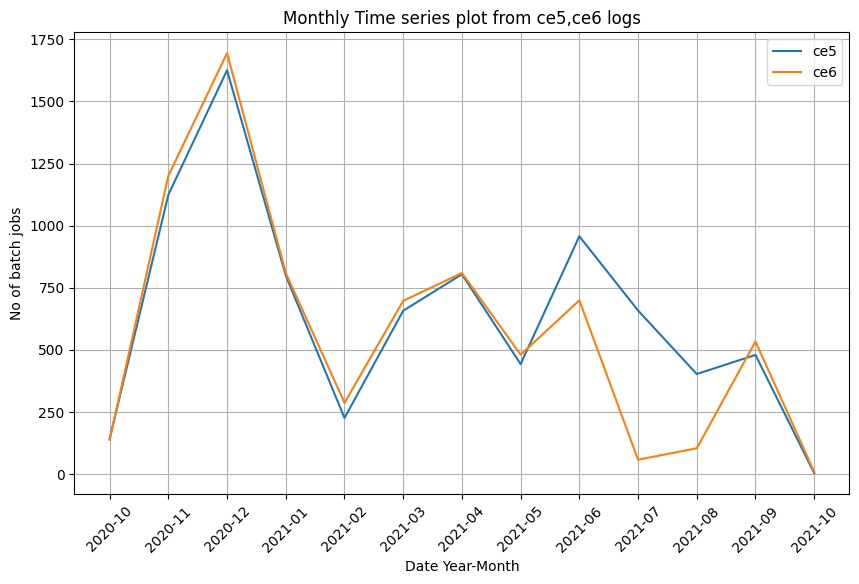

In [57]:
# Plotting multiple time series
plt.figure(figsize=(10, 6))
plt.plot(yymm0megred_df['c5-6yymm'], yymm0megred_df['c5-count'], label='ce5')
plt.plot(yymm0megred_df['c5-6yymm'], yymm0megred_df['c6-count'], label='ce6')

# Adding labels and title
plt.xlabel('Date Year-Month')
plt.ylabel('No of batch jobs')
plt.title('Monthly Time series plot from ce5,ce6 logs')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

We will now focus on batchHHMM_df and ce6batchHHMM_df frames. We will see how many jobs failed for given date range. We will keep 15 jobs as treshhold per minute.

In [58]:
ce6batchHHMM_df.head()

,dateHHMM,count,c6yymm
0,2020-10-16 11:43:00,1,2020-10
1,2020-10-16 17:43:00,15,2020-10
2,2020-10-16 22:21:00,8,2020-10
3,2020-10-16 22:31:00,16,2020-10
4,2020-10-16 22:38:00,41,2020-10


In [59]:
ce6batchHHMM_df['avglast2jobs'] = ce6batchHHMM_df['count'].rolling(window=2).mean()
batchHHMM_df['avglast2jobs'] = batchHHMM_df['count'].rolling(window=2).mean()

In [60]:
ce6batchHHMM_df

,dateHHMM,count,c6yymm,avglast2jobs
0,2020-10-16 11:43:00,1,2020-10,NaN
1,2020-10-16 17:43:00,15,2020-10,8.0
2,2020-10-16 22:21:00,8,2020-10,11.5
3,2020-10-16 22:31:00,16,2020-10,12.0
4,2020-10-16 22:38:00,41,2020-10,28.5
...,...,...,...,...
7509,2021-10-02 16:01:00,1,2021-10,1.0
7510,2021-10-02 17:48:00,1,2021-10,1.0
7511,2021-10-02 18:08:00,1,2021-10,1.0
7512,2021-10-02 18:18:00,2,2021-10,1.5


In [61]:
ce6batchHHMM_df[ce6batchHHMM_df['avglast2jobs'] >=10.0 ]

,dateHHMM,count,c6yymm,avglast2jobs
2,2020-10-16 22:21:00,8,2020-10,11.5
3,2020-10-16 22:31:00,16,2020-10,12.0
4,2020-10-16 22:38:00,41,2020-10,28.5
5,2020-10-16 22:39:00,2,2020-10,21.5
7,2020-10-16 22:45:00,4,2020-10,10.0
...,...,...,...,...
7347,2021-09-24 01:52:00,21,2021-09,11.0
7348,2021-09-24 01:53:00,3,2021-09,12.0
7362,2021-09-24 02:27:00,15,2021-09,10.0
7400,2021-09-24 04:03:00,30,2021-09,18.0


In [62]:
ce5_batchHHMM_df_avg = batchHHMM_df[batchHHMM_df['avglast2jobs'] >=10.0 ].copy()
ce6_batchHHMM_df_avg = ce6batchHHMM_df[ce6batchHHMM_df['avglast2jobs'] >=10.0 ].copy()

In [63]:
ce5_batchHHMM_df_avg = ce5_batchHHMM_df_avg.reset_index(drop=True)
ce6_batchHHMM_df_avg = ce6_batchHHMM_df_avg.reset_index(drop=True)

In [64]:
ce5_batchHHMM_df_avg = ce5_batchHHMM_df_avg.set_index('dateHHMM')

In [65]:
ce5_batchHHMM_df_avg

,count,c5yymm,avglast2jobs
dateHHMM,,,
2020-10-16 22:33:00,21,2020-10,13.0
2020-10-16 22:37:00,60,2020-10,40.5
2020-10-16 22:40:00,60,2020-10,60.0
2020-10-16 22:43:00,8,2020-10,34.0
2020-10-18 05:54:00,15,2020-10,11.5
...,...,...,...
2021-09-24 01:17:00,22,2021-09,13.0
2021-09-24 01:18:00,5,2021-09,13.5
2021-09-24 01:29:00,18,2021-09,13.5


In [66]:
ce5_batchHHMM_df_avg

,count,c5yymm,avglast2jobs
dateHHMM,,,
2020-10-16 22:33:00,21,2020-10,13.0
2020-10-16 22:37:00,60,2020-10,40.5
2020-10-16 22:40:00,60,2020-10,60.0
2020-10-16 22:43:00,8,2020-10,34.0
2020-10-18 05:54:00,15,2020-10,11.5
...,...,...,...
2021-09-24 01:17:00,22,2021-09,13.0
2021-09-24 01:18:00,5,2021-09,13.5
2021-09-24 01:29:00,18,2021-09,13.5


In [67]:
batchHHMM_df = batchHHMM_df.set_index('dateHHMM')

In [68]:
# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]

# Define the time range for slicing
start_time = batchHHMM_df.index.min()
end_time = batchHHMM_df.index.max()

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = batchHHMM_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(df_slice.index[0])
        endTime.append(df_slice.index[-1])
        countNR.append(df_slice['count'].sum())  
    
    # Move to the next 10-minute window
    current_start = current_end

ce5_timeSlice_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'COUNTS': countNR
}
)
ce5_timeSlice_df.head

<bound method NDFrame.head of                BEGINTIME             ENDTIME  COUNTS
0    2020-10-16 11:43:00 2020-10-16 11:43:00       6
1    2020-10-16 22:21:00 2020-10-16 22:21:00       2
2    2020-10-16 22:25:00 2020-10-16 22:33:00      35
3    2020-10-16 22:33:00 2020-10-16 22:43:00     149
4    2020-10-16 22:43:00 2020-10-16 22:43:00       8
...                  ...                 ...     ...
4767 2021-09-24 19:13:00 2021-09-24 19:13:00       1
4768 2021-09-24 20:16:00 2021-09-24 20:16:00       1
4769 2021-10-02 08:14:00 2021-10-02 08:14:00       1
4770 2021-10-02 17:28:00 2021-10-02 17:28:00       1
4771 2021-10-02 18:29:00 2021-10-02 18:29:00       1

[4772 rows x 3 columns]>

In [69]:
ce5_timeSlice_df[ce5_timeSlice_df['COUNTS'] > 300].nlargest(50,'COUNTS')

,BEGINTIME,ENDTIME,COUNTS
850,2020-12-04 15:43:00,2020-12-04 15:53:00,810
2621,2021-04-21 21:33:00,2021-04-21 21:43:00,505
2623,2021-04-21 21:53:00,2021-04-21 22:03:00,498
2615,2021-04-21 20:33:00,2021-04-21 20:43:00,456
852,2020-12-04 16:04:00,2020-12-04 16:13:00,440
2622,2021-04-21 21:43:00,2021-04-21 21:53:00,434
593,2020-11-30 10:23:00,2020-11-30 10:27:00,406
2614,2021-04-21 20:23:00,2021-04-21 20:33:00,404
836,2020-12-04 13:03:00,2020-12-04 13:13:00,403
857,2020-12-04 16:53:00,2020-12-04 17:01:00,397


In [70]:
ce5_timeSlice_df[ce5_timeSlice_df['BEGINTIME'] > '2021-06-03 00:00:00'].head(50)

,BEGINTIME,ENDTIME,COUNTS
3079,2021-06-03 18:11:00,2021-06-03 18:11:00,11
3080,2021-06-03 18:21:00,2021-06-03 18:21:00,1
3081,2021-06-03 18:42:00,2021-06-03 18:42:00,1
3082,2021-06-03 19:07:00,2021-06-03 19:08:00,12
3083,2021-06-03 19:18:00,2021-06-03 19:18:00,1
3084,2021-06-03 19:39:00,2021-06-03 19:39:00,2
3085,2021-06-03 19:44:00,2021-06-03 19:44:00,3
3086,2021-06-03 20:01:00,2021-06-03 20:01:00,1
3087,2021-06-03 20:14:00,2021-06-03 20:15:00,14
3088,2021-06-03 20:48:00,2021-06-03 20:48:00,1


In [71]:
ce6batchHHMM_df = ce6batchHHMM_df.set_index('dateHHMM')

In [72]:
ce6batchHHMM_df

,count,c6yymm,avglast2jobs
dateHHMM,,,
2020-10-16 11:43:00,1,2020-10,NaN
2020-10-16 17:43:00,15,2020-10,8.0
2020-10-16 22:21:00,8,2020-10,11.5
2020-10-16 22:31:00,16,2020-10,12.0
2020-10-16 22:38:00,41,2020-10,28.5
...,...,...,...
2021-10-02 16:01:00,1,2021-10,1.0
2021-10-02 17:48:00,1,2021-10,1.0
2021-10-02 18:08:00,1,2021-10,1.0


In [73]:
# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]

# Define the time range for slicing
start_time = ce6batchHHMM_df.index.min()
end_time = ce6batchHHMM_df.index.max()

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = ce6batchHHMM_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(df_slice.index[0])
        endTime.append(df_slice.index[-1])
        countNR.append(df_slice['count'].sum())  
    
    # Move to the next 10-minute window
    current_start = current_end

ce6_timeSlice_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'COUNTS': countNR
}
)
ce6_timeSlice_df.head

<bound method NDFrame.head of                BEGINTIME             ENDTIME  COUNTS
0    2020-10-16 11:43:00 2020-10-16 11:43:00       1
1    2020-10-16 17:43:00 2020-10-16 17:43:00      15
2    2020-10-16 17:43:00 2020-10-16 17:43:00      15
3    2020-10-16 22:21:00 2020-10-16 22:21:00       8
4    2020-10-16 22:31:00 2020-10-16 22:31:00      16
...                  ...                 ...     ...
4352 2021-10-02 15:56:00 2021-10-02 16:01:00       2
4353 2021-10-02 17:48:00 2021-10-02 17:48:00       1
4354 2021-10-02 18:08:00 2021-10-02 18:08:00       1
4355 2021-10-02 18:18:00 2021-10-02 18:18:00       2
4356 2021-10-06 15:39:00 2021-10-06 15:39:00       1

[4357 rows x 3 columns]>

In [74]:
ce6_timeSlice_df

,BEGINTIME,ENDTIME,COUNTS
0,2020-10-16 11:43:00,2020-10-16 11:43:00,1
1,2020-10-16 17:43:00,2020-10-16 17:43:00,15
2,2020-10-16 17:43:00,2020-10-16 17:43:00,15
3,2020-10-16 22:21:00,2020-10-16 22:21:00,8
4,2020-10-16 22:31:00,2020-10-16 22:31:00,16
...,...,...,...
4352,2021-10-02 15:56:00,2021-10-02 16:01:00,2
4353,2021-10-02 17:48:00,2021-10-02 17:48:00,1
4354,2021-10-02 18:08:00,2021-10-02 18:08:00,1
4355,2021-10-02 18:18:00,2021-10-02 18:18:00,2


In [75]:
ce5_timeSlice_df

,BEGINTIME,ENDTIME,COUNTS
0,2020-10-16 11:43:00,2020-10-16 11:43:00,6
1,2020-10-16 22:21:00,2020-10-16 22:21:00,2
2,2020-10-16 22:25:00,2020-10-16 22:33:00,35
3,2020-10-16 22:33:00,2020-10-16 22:43:00,149
4,2020-10-16 22:43:00,2020-10-16 22:43:00,8
...,...,...,...
4767,2021-09-24 19:13:00,2021-09-24 19:13:00,1
4768,2021-09-24 20:16:00,2021-09-24 20:16:00,1
4769,2021-10-02 08:14:00,2021-10-02 08:14:00,1
4770,2021-10-02 17:28:00,2021-10-02 17:28:00,1


## ce5 and ce6 combined logic starts

In [143]:
ce5_ce6_combined_df = pd.concat([ce5_timeSlice_df, ce6_timeSlice_df]).sort_values(by='BEGINTIME').reset_index(drop=True)
ce5_ce6_combined_df

,BEGINTIME,ENDTIME,COUNTS
0,2020-10-16 11:43:00,2020-10-16 11:43:00,6
1,2020-10-16 11:43:00,2020-10-16 11:43:00,1
2,2020-10-16 17:43:00,2020-10-16 17:43:00,15
3,2020-10-16 17:43:00,2020-10-16 17:43:00,15
4,2020-10-16 22:21:00,2020-10-16 22:21:00,2
...,...,...,...
9124,2021-10-02 17:48:00,2021-10-02 17:48:00,1
9125,2021-10-02 18:08:00,2021-10-02 18:08:00,1
9126,2021-10-02 18:18:00,2021-10-02 18:18:00,2
9127,2021-10-02 18:29:00,2021-10-02 18:29:00,1


In [144]:
ce5_ce6_combined_df[(
    ce5_ce6_combined_df['BEGINTIME'] >= pd.to_datetime('2021-04-21 00:00:00')
) & (
    ce5_ce6_combined_df['ENDTIME'] <= pd.to_datetime('2021-04-22 00:00:00')
)].sort_values(by=['BEGINTIME','ENDTIME'])

,BEGINTIME,ENDTIME,COUNTS
5332,2021-04-21 00:44:00,2021-04-21 00:44:00,2
5333,2021-04-21 00:51:00,2021-04-21 00:51:00,2
5334,2021-04-21 01:01:00,2021-04-21 01:01:00,2
5335,2021-04-21 01:12:00,2021-04-21 01:12:00,10
5336,2021-04-21 01:47:00,2021-04-21 01:47:00,2
...,...,...,...
5448,2021-04-21 22:23:00,2021-04-21 22:32:00,200
5449,2021-04-21 22:23:00,2021-04-21 22:32:00,174
5450,2021-04-21 22:34:00,2021-04-21 22:39:00,77
5451,2021-04-21 22:34:00,2021-04-21 22:39:00,141


In [145]:
ce5_ce6_combined_df.set_index(['BEGINTIME','ENDTIME'])
ce5_ce6_combined_df

,BEGINTIME,ENDTIME,COUNTS
0,2020-10-16 11:43:00,2020-10-16 11:43:00,6
1,2020-10-16 11:43:00,2020-10-16 11:43:00,1
2,2020-10-16 17:43:00,2020-10-16 17:43:00,15
3,2020-10-16 17:43:00,2020-10-16 17:43:00,15
4,2020-10-16 22:21:00,2020-10-16 22:21:00,2
...,...,...,...
9124,2021-10-02 17:48:00,2021-10-02 17:48:00,1
9125,2021-10-02 18:08:00,2021-10-02 18:08:00,1
9126,2021-10-02 18:18:00,2021-10-02 18:18:00,2
9127,2021-10-02 18:29:00,2021-10-02 18:29:00,1


In [146]:
ce5_ce6_combined_df = ce5_ce6_combined_df.set_index(['BEGINTIME','ENDTIME'])

In [147]:
# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]

# Define the time range for slicing
start_time = pd.to_datetime('2021-04-21 00:00:00')
end_time = pd.to_datetime('2021-04-22 00:00:00')

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = ce5_ce6_combined_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(df_slice['COUNTS'].sum())
    else:
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(0)
    
    # Move to the next 10-minute window
    current_start = current_end

ce5_ce6_focus_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'COUNTS': countNR
}
)
ce5_ce6_focus_df.head

<bound method NDFrame.head of               BEGINTIME             ENDTIME  COUNTS
0   2021-04-21 00:00:00 2021-04-21 00:10:00       0
1   2021-04-21 00:10:00 2021-04-21 00:20:00       0
2   2021-04-21 00:20:00 2021-04-21 00:30:00       0
3   2021-04-21 00:30:00 2021-04-21 00:40:00       0
4   2021-04-21 00:40:00 2021-04-21 00:50:00       2
..                  ...                 ...     ...
140 2021-04-21 23:20:00 2021-04-21 23:30:00       0
141 2021-04-21 23:30:00 2021-04-21 23:40:00       4
142 2021-04-21 23:40:00 2021-04-21 23:50:00       0
143 2021-04-21 23:50:00 2021-04-22 00:00:00       0
144 2021-04-22 00:00:00 2021-04-22 00:10:00       0

[145 rows x 3 columns]>

In [150]:
ce5_ce6_focus_df.head(50)

,BEGINTIME,ENDTIME,COUNTS
0,2021-04-21 00:00:00,2021-04-21 00:10:00,0
1,2021-04-21 00:10:00,2021-04-21 00:20:00,0
2,2021-04-21 00:20:00,2021-04-21 00:30:00,0
3,2021-04-21 00:30:00,2021-04-21 00:40:00,0
4,2021-04-21 00:40:00,2021-04-21 00:50:00,2
5,2021-04-21 00:50:00,2021-04-21 01:00:00,2
6,2021-04-21 01:00:00,2021-04-21 01:10:00,2
7,2021-04-21 01:10:00,2021-04-21 01:20:00,10
8,2021-04-21 01:20:00,2021-04-21 01:30:00,0
9,2021-04-21 01:30:00,2021-04-21 01:40:00,0


## Get the ACCRES data here

In [151]:
import re
jobs = pd.read_csv("../data/fullsample.csv")
jobs['isSeverError'] = jobs['EXITCODE'].apply(lambda x : 1  if x[0:1] != '0' else 0)
jobs['isClientError'] = jobs['EXITCODE'].apply(lambda x : 1  if x[2:3] != '0' else 0)
jobs = jobs[jobs['BEGIN'].str.strip().str[0:4] != 'Unkn']
jobs = jobs[jobs['END'].str.strip().str[0:4] != 'Unkn']
jobs['BEGIN'] = pd.to_datetime(jobs['BEGIN'])
jobs['END'] = pd.to_datetime(jobs['END'])
jobs = jobs.sort_values(by='BEGIN')


In [152]:
def convertTimeToMinutes(timeStr):
    if len(timeStr) == 8:
        timedata = re.match(r'(\d+):(\d+):(\d+)',timeStr)
        return (int(timedata.group(1)) * 60) + int(timedata.group(2)) + (int(timedata.group(3)) / 60 )
    elif len(timeStr) == 10 or len(timeStr) == 11:
        timedata = re.match(r'(\d+)-(\d+):(\d+):(\d+)',timeStr)
        return (int(timedata.group(1)) * 24 * 60 ) + (int(timedata.group(2)) * 60) + int(timedata.group(3)) + (int(timedata.group(4)) / 60 )

jobs['REQTIMEMIN'] = jobs['REQTIME'].apply(convertTimeToMinutes)
jobs['USEDTIMEMIN'] = jobs['USEDTIME'].apply(convertTimeToMinutes)

jobs = jobs.sort_values(by='BEGIN',ascending=True)


In [199]:
jobs = jobs[jobs['STATE'] == 'COMPLETED']
jobs

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE,isSeverError,isClientError,REQTIMEMIN,USEDTIMEMIN,jobTimeProportion
6640555,24460555,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024Mc,6.23M,00:30:00,00:20:05,1,4,production,0:0,0,0,30.0,20.083333,66.944444
6640560,24460560,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:17,1024Mc,6.23M,00:30:00,00:20:09,1,4,production,0:0,0,0,30.0,20.150000,67.166667
6640559,24460559,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024Mc,6.24M,00:30:00,00:20:06,1,4,production,0:0,0,0,30.0,20.100000,67.000000
6640558,24460558,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:14,1024Mc,6.23M,00:30:00,00:20:06,1,4,production,0:0,0,0,30.0,20.100000,67.000000
6640557,24460557,COMPLETED,2020-10-01 00:03:08,2020-10-01 00:23:13,1024Mc,6.24M,00:30:00,00:20:05,1,4,production,0:0,0,0,30.0,20.083333,66.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927386,32923987,COMPLETED,2021-10-07 20:09:26,2021-10-07 20:11:21,2000Mn,0.09M,2-00:00:00,00:01:55,1,1,sam,0:0,0,0,2880.0,1.916667,0.066551
927387,32923988,COMPLETED,2021-10-07 20:15:05,2021-10-07 20:17:24,2000Mn,0.09M,2-00:00:00,00:02:19,1,1,sam,0:0,0,0,2880.0,2.316667,0.080440
927388,32923989,COMPLETED,2021-10-07 20:24:26,2021-10-07 20:26:01,2000Mn,393.07M,2-00:00:00,00:01:35,1,1,sam,0:0,0,0,2880.0,1.583333,0.054977
1491977,32923996,COMPLETED,2021-10-07 20:31:08,2021-10-07 20:32:45,2000Mn,0.09M,2-00:00:00,00:01:37,1,1,sam,0:0,0,0,2880.0,1.616667,0.056134


In [191]:
jobs['jobTimeProportion'] = jobs['USEDTIMEMIN'] / jobs['REQTIMEMIN'] * 100
job_time_check_df = jobs[['BEGIN','END','isSeverError','isClientError','jobTimeProportion','STATE']].copy()
job_time_check_df = job_time_check_df.sort_values(by='END').reset_index(drop=True)


C:\Users\nitin\AppData\Local\Temp\ipykernel_46148\2199984065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobs['jobTimeProportion'] = jobs['USEDTIMEMIN'] / jobs['REQTIMEMIN'] * 100


In [192]:
job_time_check_df[(
    job_time_check_df['jobTimeProportion'] <= 80
) & (
    job_time_check_df['END'] >= '2021-04-21 00:00:00'
) & (
    job_time_check_df['END'] <= '2021-04-22 23:59:59'
)][['END','jobTimeProportion']]

,END,jobTimeProportion
3512775,2021-04-21 00:00:00,40.765278
3512777,2021-04-21 00:00:28,39.440972
3512779,2021-04-21 00:00:46,61.618056
3512780,2021-04-21 00:00:47,7.861111
3512781,2021-04-21 00:01:21,7.955556
...,...,...
3554138,2021-04-22 23:59:37,26.523810
3554139,2021-04-22 23:59:47,0.004051
3554140,2021-04-22 23:59:47,0.004051
3554141,2021-04-22 23:59:48,0.004630


In [193]:
focusRecords_df = job_time_check_df[(
    job_time_check_df['jobTimeProportion'] <= 80
) & (
    job_time_check_df['END'] >= '2021-04-21 00:00:00'
) & (
    job_time_check_df['END'] <= '2021-04-22 23:59:59'
)][['END','jobTimeProportion']]

focusRecords_df.sort_values(by='END').reset_index(drop=True)
focusRecords_df = focusRecords_df.set_index('END')
focusRecords_df

,jobTimeProportion
END,
2021-04-21 00:00:00,40.765278
2021-04-21 00:00:28,39.440972
2021-04-21 00:00:46,61.618056
2021-04-21 00:00:47,7.861111
2021-04-21 00:01:21,7.955556
...,...
2021-04-22 23:59:37,26.523810
2021-04-22 23:59:47,0.004051
2021-04-22 23:59:47,0.004051


In [194]:
# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]
countNR2=[]

# Define the time range for slicing
start_time = pd.to_datetime('2021-04-21 00:00:00')
end_time = pd.to_datetime('2021-04-21 23:59:59')

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = focusRecords_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(df_slice['jobTimeProportion'].mean())
        countNR2.append(df_slice['jobTimeProportion'].count())
    else:
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(0)
        countNR2.append(0)
    
    # Move to the next 10-minute window
    current_start = current_end

Accre_timeSlice_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'AvgCompletionTime': countNR,
    'JobCompleteCount': countNR2
}
)
Accre_timeSlice_df.head

<bound method NDFrame.head of               BEGINTIME             ENDTIME  AvgCompletionTime  \
0   2021-04-21 00:00:00 2021-04-21 00:10:00          17.730837   
1   2021-04-21 00:10:00 2021-04-21 00:20:00          21.833938   
2   2021-04-21 00:20:00 2021-04-21 00:30:00          26.439500   
3   2021-04-21 00:30:00 2021-04-21 00:40:00          20.006976   
4   2021-04-21 00:40:00 2021-04-21 00:50:00          14.848357   
..                  ...                 ...                ...   
139 2021-04-21 23:10:00 2021-04-21 23:20:00           0.519639   
140 2021-04-21 23:20:00 2021-04-21 23:30:00           7.097669   
141 2021-04-21 23:30:00 2021-04-21 23:40:00          29.495148   
142 2021-04-21 23:40:00 2021-04-21 23:50:00          11.184709   
143 2021-04-21 23:50:00 2021-04-22 00:00:00           0.515286   

     JobCompleteCount  
0                  47  
1                  23  
2                  22  
3                  20  
4                  28  
..                ...  
139      

In [195]:
ce_acre_merge_df = pd.merge(left=ce5_ce6_focus_df,right=Accre_timeSlice_df,how='inner', on=['BEGINTIME','ENDTIME'])

In [196]:
ce_acre_merge_df.tail(60)

,BEGINTIME,ENDTIME,COUNTS,AvgCompletionTime,JobCompleteCount
84,2021-04-21 14:00:00,2021-04-21 14:10:00,3,28.287201,72
85,2021-04-21 14:10:00,2021-04-21 14:20:00,9,10.859234,224
86,2021-04-21 14:20:00,2021-04-21 14:30:00,0,18.475643,72
87,2021-04-21 14:30:00,2021-04-21 14:40:00,0,13.481203,117
88,2021-04-21 14:40:00,2021-04-21 14:50:00,0,17.612776,130
89,2021-04-21 14:50:00,2021-04-21 15:00:00,6,14.044280,115
90,2021-04-21 15:00:00,2021-04-21 15:10:00,0,18.685444,123
91,2021-04-21 15:10:00,2021-04-21 15:20:00,0,16.973779,95
92,2021-04-21 15:20:00,2021-04-21 15:30:00,0,14.536096,125
93,2021-04-21 15:30:00,2021-04-21 15:40:00,0,10.988592,131


<Figure size 1000x600 with 0 Axes>

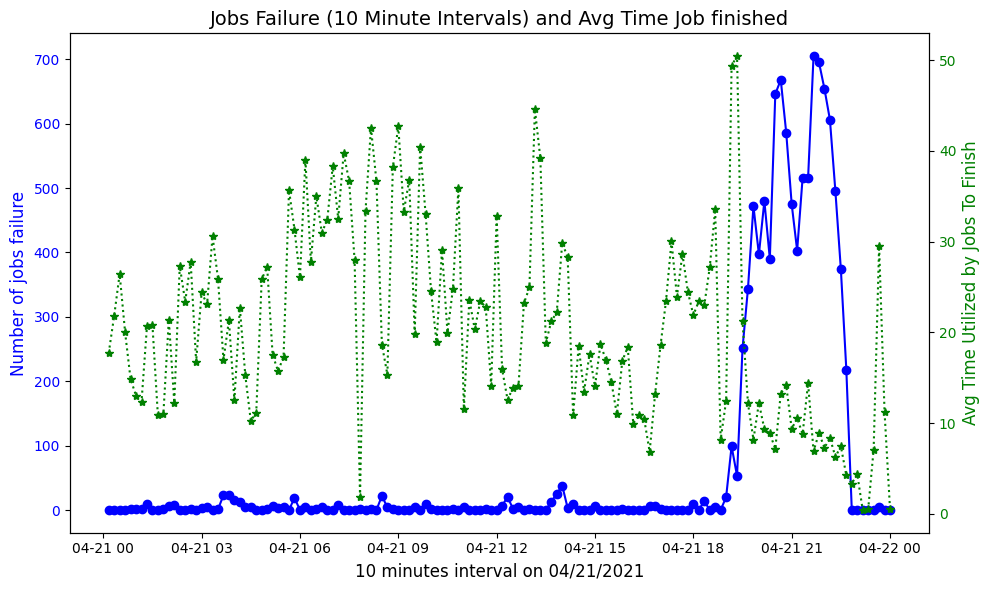

In [197]:
import matplotlib.pyplot as plt
import pandas as pd

time_series = pd.date_range(start="2021-04-21 00:00:00", periods=10, freq="10T")
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(ce_acre_merge_df['ENDTIME'], ce_acre_merge_df['COUNTS'], marker='o', color='b', label='jobs failure')
ax1.set_xlabel('10 minutes interval on 04/21/2021', fontsize=12)
ax1.set_ylabel('Number of jobs failure', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(ce_acre_merge_df['ENDTIME'], ce_acre_merge_df['AvgCompletionTime'], marker='*', color='g', label='Counts 2',linestyle=':')
ax2.set_ylabel('Avg Time Utilized by Jobs To Finish', fontsize=12, color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Jobs Failure (10 Minute Intervals) and Avg Time Job finished', fontsize=14)

fig.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

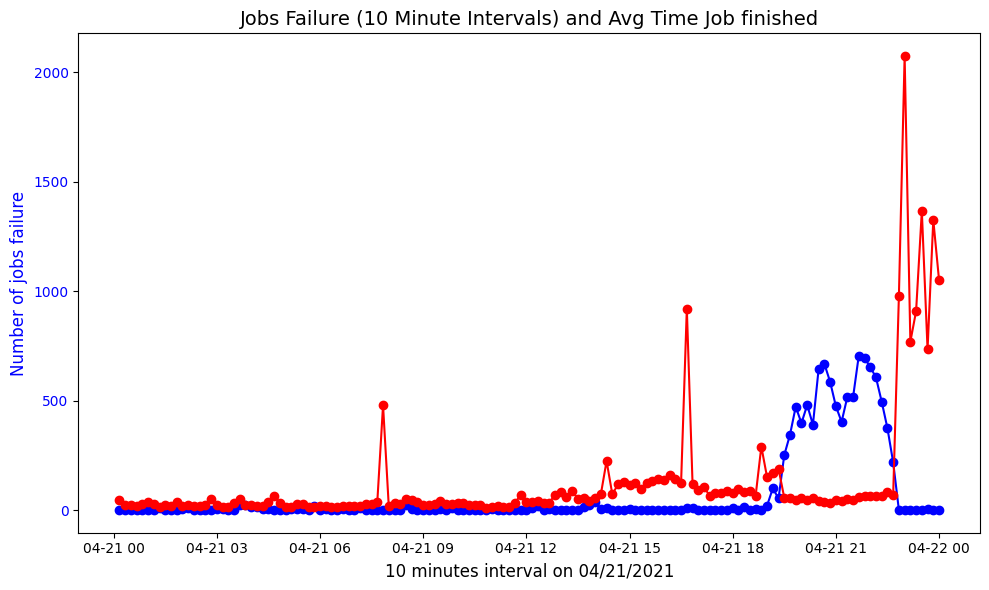

In [198]:

time_series = pd.date_range(start="2021-04-21 00:00:00", periods=10, freq="10T")
plt.figure(figsize=(10, 6))

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(ce_acre_merge_df['ENDTIME'], ce_acre_merge_df['COUNTS'], marker='o', color='b', label='jobs failure')
ax1.plot(ce_acre_merge_df['ENDTIME'], ce_acre_merge_df['JobCompleteCount'], marker='o', color='r', label='jobs success')
ax1.set_xlabel('10 minutes interval on 04/21/2021', fontsize=12)
ax1.set_ylabel('Number of jobs failure', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.title('Jobs Failure (10 Minute Intervals) and Avg Time Job finished', fontsize=14)

fig.tight_layout()
plt.show()

In [209]:
ce_acre_merge_df['isFailure'] = [1 if x > 50 else 0 for x in list(ce_acre_merge_df['COUNTS'])]
ce_acre_merge_df.tail(50)


,BEGINTIME,ENDTIME,COUNTS,AvgCompletionTime,JobCompleteCount,isFailure
94,2021-04-21 15:40:00,2021-04-21 15:50:00,1,16.872035,143,0
95,2021-04-21 15:50:00,2021-04-21 16:00:00,0,18.378959,135,0
96,2021-04-21 16:00:00,2021-04-21 16:10:00,0,9.951866,159,0
97,2021-04-21 16:10:00,2021-04-21 16:20:00,0,10.881089,143,0
98,2021-04-21 16:20:00,2021-04-21 16:30:00,0,10.464072,125,0
99,2021-04-21 16:30:00,2021-04-21 16:40:00,7,6.876256,921,0
100,2021-04-21 16:40:00,2021-04-21 16:50:00,7,13.191229,119,0
101,2021-04-21 16:50:00,2021-04-21 17:00:00,2,18.591672,91,0
102,2021-04-21 17:00:00,2021-04-21 17:10:00,0,23.476019,104,0
103,2021-04-21 17:10:00,2021-04-21 17:20:00,0,30.043766,65,0


In [211]:
job_fail_log = smf.logit("isFailure ~ JobCompleteCount",
                          data = ce_acre_merge_df).fit()

Optimization terminated successfully.
         Current function value: 0.421389
         Iterations 7


In [212]:
job_fail_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              isFailure   No. Observations:                  144
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                 0.01429
Time:                        08:32:14   Log-Likelihood:                -60.680
converged:                       True   LL-Null:                       -61.560
Covariance Type:            nonrobust   LLR p-value:                    0.1847
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.5496      0.265     -5.849      0.000      -2.069      -1.030
JobCompleteCount    -0.0018      0.002     -0.969      0.332      -0.006       0.002
====================================================================================
"""

In [213]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

In [225]:
jobSucceeded = 1000

logit_p = -1.5496 + (-0.0018 * jobSucceeded)

print(f'Estimated Probability of job failure: {logistic(logit_p)}')

Estimated Probability of job failure: 0.03390826511437321


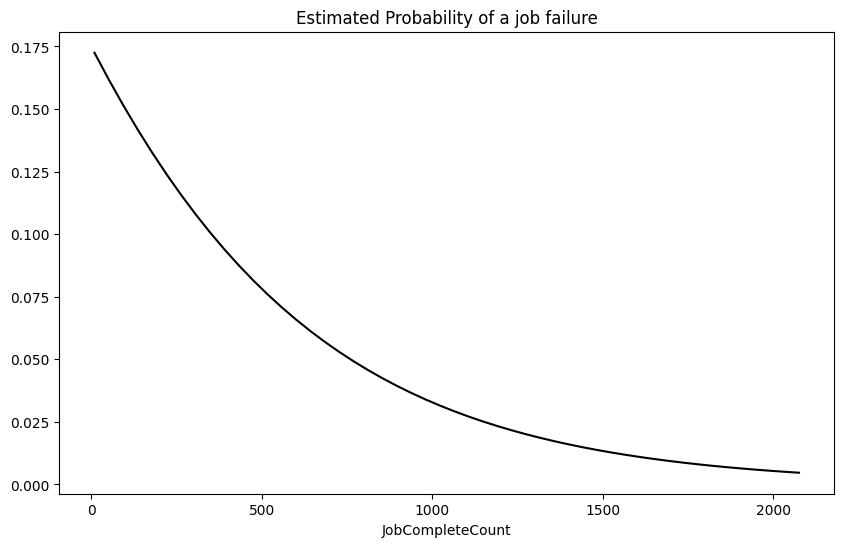

In [226]:
fit_df = pd.DataFrame({
    'JobCompleteCount': np.linspace(start = ce_acre_merge_df['JobCompleteCount'].min(),
                            stop = ce_acre_merge_df['JobCompleteCount'].max()
                            )
})

fit_df['fit'] = job_fail_log.predict(fit_df)

fit_df.plot(x = 'JobCompleteCount',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of a job failure');

In [235]:
jb_summary = (
    ce_acre_merge_df
    .assign(group = pd.qcut(ce_acre_merge_df['JobCompleteCount'], 
                            q = 25, 
                            duplicates = 'drop'))
    .groupby('group',observed = False )
    [['JobCompleteCount', 'isFailure']]
    .mean()
    .reset_index()
    .rename(columns = {'isFailure': 'eprob'})
)
jb_summary

,group,JobCompleteCount,eprob
0,"(9.999, 14.0]",12.888889,0.000000
1,"(14.0, 16.0]",16.000000,0.000000
2,"(16.0, 18.0]",17.714286,0.000000
3,"(18.0, 19.0]",19.000000,0.000000
4,"(19.0, 22.0]",21.333333,0.000000
5,"(22.0, 23.0]",23.000000,0.000000
6,"(23.0, 25.04]",24.750000,0.000000
7,"(25.04, 27.76]",26.800000,0.000000
8,"(27.76, 30.48]",28.666667,0.000000
9,"(30.48, 33.2]",31.833333,0.166667


In [236]:
jb_summary['fit_prob'] = job_fail_log.predict(jb_summary[['JobCompleteCount']])
jb_summary

,group,JobCompleteCount,eprob,fit_prob
0,"(9.999, 14.0]",12.888889,0.000000,0.171754
1,"(14.0, 16.0]",16.000000,0.000000,0.170944
2,"(16.0, 18.0]",17.714286,0.000000,0.170499
3,"(18.0, 19.0]",19.000000,0.000000,0.170166
4,"(19.0, 22.0]",21.333333,0.000000,0.169562
5,"(22.0, 23.0]",23.000000,0.000000,0.169132
6,"(23.0, 25.04]",24.750000,0.000000,0.168682
7,"(25.04, 27.76]",26.800000,0.000000,0.168155
8,"(27.76, 30.48]",28.666667,0.000000,0.167677
9,"(30.48, 33.2]",31.833333,0.166667,0.166868


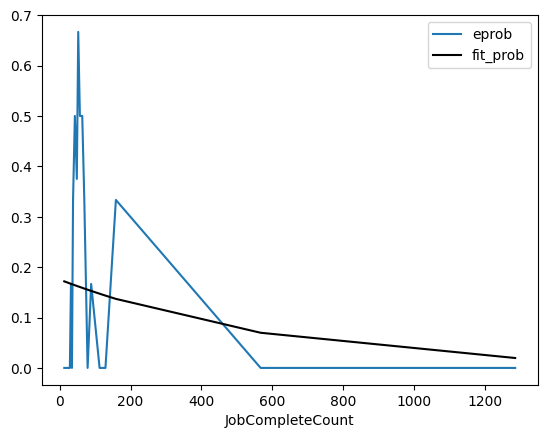

In [237]:
ax = jb_summary.plot(x = 'JobCompleteCount', y = 'eprob')
jb_summary.plot(x = 'JobCompleteCount', y = 'fit_prob',
                color = 'black',
                ax = ax);

In [238]:
jb_summary['elogit'] = np.log(jb_summary['eprob'] / (1 - jb_summary['eprob']))
jb_summary['fit_logit'] = np.log(jb_summary['fit_prob'] / (1 - jb_summary['fit_prob']))
jb_summary

C:\Users\nitin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,group,JobCompleteCount,eprob,fit_prob,elogit,fit_logit
0,"(9.999, 14.0]",12.888889,0.000000,0.171754,-inf,-1.573246
1,"(14.0, 16.0]",16.000000,0.000000,0.170944,-inf,-1.578951
2,"(16.0, 18.0]",17.714286,0.000000,0.170499,-inf,-1.582095
3,"(18.0, 19.0]",19.000000,0.000000,0.170166,-inf,-1.584453
4,"(19.0, 22.0]",21.333333,0.000000,0.169562,-inf,-1.588732
5,"(22.0, 23.0]",23.000000,0.000000,0.169132,-inf,-1.591788
6,"(23.0, 25.04]",24.750000,0.000000,0.168682,-inf,-1.594997
7,"(25.04, 27.76]",26.800000,0.000000,0.168155,-inf,-1.598757
8,"(27.76, 30.48]",28.666667,0.000000,0.167677,-inf,-1.602180
9,"(30.48, 33.2]",31.833333,0.166667,0.166868,-1.609438,-1.607987


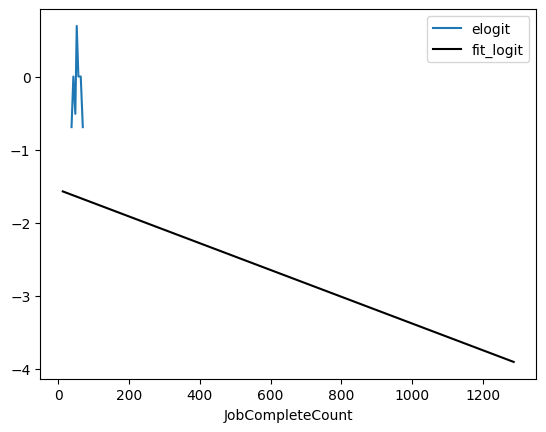

In [239]:
ax = jb_summary.plot(x = 'JobCompleteCount', y = 'elogit')
jb_summary.plot(x = 'JobCompleteCount', y = 'fit_logit',
                color = 'black',
                ax = ax);

### Lets focus on larger dataset

In [252]:
larger_ce5_ce6_combined_df = pd.concat([ce5_timeSlice_df, ce6_timeSlice_df]).sort_values(by='BEGINTIME').reset_index(drop=True)


larger_ce5_ce6_combined_df[(
    larger_ce5_ce6_combined_df['BEGINTIME'] >= pd.to_datetime('2020-10-16 17:40:00')
) & (
    larger_ce5_ce6_combined_df['ENDTIME'] <= pd.to_datetime('2021-02-01 23:59:59')
)].sort_values(by=['BEGINTIME','ENDTIME'])

larger_ce5_ce6_combined_df = larger_ce5_ce6_combined_df.set_index(['BEGINTIME','ENDTIME'])



# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]

# Define the time range for slicing
start_time = pd.to_datetime('2020-10-16 17:40:00')
end_time = pd.to_datetime('2021-02-01 23:59:59')

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = larger_ce5_ce6_combined_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(df_slice['COUNTS'].sum())
    else:
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(0)
    
    # Move to the next 10-minute window
    current_start = current_end

larger_ce5_ce6_focus_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'COUNTS': countNR
}
)
larger_ce5_ce6_focus_df.head

<bound method NDFrame.head of                 BEGINTIME             ENDTIME  COUNTS
0     2020-10-16 17:40:00 2020-10-16 17:50:00      30
1     2020-10-16 17:50:00 2020-10-16 18:00:00       0
2     2020-10-16 18:00:00 2020-10-16 18:10:00       0
3     2020-10-16 18:10:00 2020-10-16 18:20:00       0
4     2020-10-16 18:20:00 2020-10-16 18:30:00       0
...                   ...                 ...     ...
15585 2021-02-01 23:10:00 2021-02-01 23:20:00       0
15586 2021-02-01 23:20:00 2021-02-01 23:30:00       0
15587 2021-02-01 23:30:00 2021-02-01 23:40:00       0
15588 2021-02-01 23:40:00 2021-02-01 23:50:00       0
15589 2021-02-01 23:50:00 2021-02-02 00:00:00       0

[15590 rows x 3 columns]>

In [253]:
larger_ce5_ce6_focus_df.head(50)

,BEGINTIME,ENDTIME,COUNTS
0,2020-10-16 17:40:00,2020-10-16 17:50:00,30
1,2020-10-16 17:50:00,2020-10-16 18:00:00,0
2,2020-10-16 18:00:00,2020-10-16 18:10:00,0
3,2020-10-16 18:10:00,2020-10-16 18:20:00,0
4,2020-10-16 18:20:00,2020-10-16 18:30:00,0
5,2020-10-16 18:30:00,2020-10-16 18:40:00,0
6,2020-10-16 18:40:00,2020-10-16 18:50:00,0
7,2020-10-16 18:50:00,2020-10-16 19:00:00,0
8,2020-10-16 19:00:00,2020-10-16 19:10:00,0
9,2020-10-16 19:10:00,2020-10-16 19:20:00,0


In [254]:
larger_focusRecords_df = job_time_check_df[(
    job_time_check_df['jobTimeProportion'] <= 80
) & (
    job_time_check_df['END'] >= '2020-10-16 17:40:00'
) & (
    job_time_check_df['END'] <= '2021-02-01 23:59:59'
)][['END','jobTimeProportion']]

larger_focusRecords_df.sort_values(by='END').reset_index(drop=True)
larger_focusRecords_df = larger_focusRecords_df.set_index('END')
larger_focusRecords_df

# Create an empty list to store the sliced DataFrames
dfs = []
beginTime=[]
endTime=[]
countNR=[]
countNR2=[]

# Define the time range for slicing
start_time = pd.to_datetime('2020-10-16 17:40:00')
end_time = pd.to_datetime('2021-02-01 23:59:59')

# Slice the data by 10-minute intervals
current_start = start_time

while current_start <= end_time:
    # Define the end of the current 10-minute slice
    current_end = current_start + pd.Timedelta(minutes=10)
    
    # Slice the DataFrame between current_start and current_end
    df_slice = larger_focusRecords_df.loc[current_start:current_end]
    
    # Add the sliced DataFrame to the list, capture the start and end times and counts for that range
    if df_slice.shape[0] != 0:
        dfs.append(df_slice)
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(df_slice['jobTimeProportion'].mean())
        countNR2.append(df_slice['jobTimeProportion'].count())
    else:
        beginTime.append(current_start)
        endTime.append(current_end)
        countNR.append(0)
        countNR2.append(0)
    
    # Move to the next 10-minute window
    current_start = current_end

larger_Accre_timeSlice_df = pd.DataFrame({
     'BEGINTIME': beginTime,
    'ENDTIME': endTime,
    'AvgCompletionTime': countNR,
    'JobCompleteCount': countNR2
}
)
larger_Accre_timeSlice_df.head

<bound method NDFrame.head of                 BEGINTIME             ENDTIME  AvgCompletionTime  \
0     2020-10-16 17:40:00 2020-10-16 17:50:00           8.460022   
1     2020-10-16 17:50:00 2020-10-16 18:00:00           9.712329   
2     2020-10-16 18:00:00 2020-10-16 18:10:00          11.480020   
3     2020-10-16 18:10:00 2020-10-16 18:20:00          10.383759   
4     2020-10-16 18:20:00 2020-10-16 18:30:00          16.739060   
...                   ...                 ...                ...   
15585 2021-02-01 23:10:00 2021-02-01 23:20:00          35.323797   
15586 2021-02-01 23:20:00 2021-02-01 23:30:00          37.100478   
15587 2021-02-01 23:30:00 2021-02-01 23:40:00          41.953882   
15588 2021-02-01 23:40:00 2021-02-01 23:50:00          37.732115   
15589 2021-02-01 23:50:00 2021-02-02 00:00:00          43.699861   

       JobCompleteCount  
0                   156  
1                   145  
2                   192  
3                   206  
4                   398

In [255]:
larger_ce_acre_merge_df = pd.merge(left=larger_ce5_ce6_focus_df,right=larger_Accre_timeSlice_df,how='inner', on=['BEGINTIME','ENDTIME'])
larger_ce_acre_merge_df

,BEGINTIME,ENDTIME,COUNTS,AvgCompletionTime,JobCompleteCount
0,2020-10-16 17:40:00,2020-10-16 17:50:00,30,8.460022,156
1,2020-10-16 17:50:00,2020-10-16 18:00:00,0,9.712329,145
2,2020-10-16 18:00:00,2020-10-16 18:10:00,0,11.480020,192
3,2020-10-16 18:10:00,2020-10-16 18:20:00,0,10.383759,206
4,2020-10-16 18:20:00,2020-10-16 18:30:00,0,16.739060,398
...,...,...,...,...,...
15585,2021-02-01 23:10:00,2021-02-01 23:20:00,0,35.323797,191
15586,2021-02-01 23:20:00,2021-02-01 23:30:00,0,37.100478,276
15587,2021-02-01 23:30:00,2021-02-01 23:40:00,0,41.953882,195
15588,2021-02-01 23:40:00,2021-02-01 23:50:00,0,37.732115,102


In [258]:
# import matplotlib.pyplot as plt
# import pandas as pd

# time_series = pd.date_range(start="2020-10-16 17:40:00",periods=10, freq="10T")
# plt.figure(figsize=(10, 6))

# fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1.plot(larger_ce_acre_merge_df['ENDTIME'], larger_ce_acre_merge_df['COUNTS'], marker='o', color='b', label='jobs failure')
# ax1.set_xlabel('10 minutes interval ', fontsize=12)
# ax1.set_ylabel('Number of jobs failure', fontsize=12, color='b')
# ax1.tick_params(axis='y', labelcolor='b')

# ax2 = ax1.twinx()
# ax2.plot(larger_ce_acre_merge_df['ENDTIME'], larger_ce_acre_merge_df['AvgCompletionTime'], marker='*', color='g', label='Counts 2',linestyle=':')
# ax2.set_ylabel('Avg Time Utilized by Jobs To Finish', fontsize=12, color='g')
# ax2.tick_params(axis='y', labelcolor='g')

# plt.title('Jobs Failure (10 Minute Intervals) and Avg Time Job finished', fontsize=14)

# fig.tight_layout()
# plt.show()

In [259]:
larger_ce_acre_merge_df['isFailure'] = [1 if x > 50 else 0 for x in list(larger_ce_acre_merge_df['COUNTS'])]
larger_ce_acre_merge_df

,BEGINTIME,ENDTIME,COUNTS,AvgCompletionTime,JobCompleteCount,isFailure
0,2020-10-16 17:40:00,2020-10-16 17:50:00,30,8.460022,156,0
1,2020-10-16 17:50:00,2020-10-16 18:00:00,0,9.712329,145,0
2,2020-10-16 18:00:00,2020-10-16 18:10:00,0,11.480020,192,0
3,2020-10-16 18:10:00,2020-10-16 18:20:00,0,10.383759,206,0
4,2020-10-16 18:20:00,2020-10-16 18:30:00,0,16.739060,398,0
...,...,...,...,...,...,...
15585,2021-02-01 23:10:00,2021-02-01 23:20:00,0,35.323797,191,0
15586,2021-02-01 23:20:00,2021-02-01 23:30:00,0,37.100478,276,0
15587,2021-02-01 23:30:00,2021-02-01 23:40:00,0,41.953882,195,0
15588,2021-02-01 23:40:00,2021-02-01 23:50:00,0,37.732115,102,0


In [260]:
large_job_fail_log = smf.logit("isFailure ~ JobCompleteCount",
                          data = larger_ce_acre_merge_df).fit()

Optimization terminated successfully.
         Current function value: 0.114460
         Iterations 8


In [261]:
large_job_fail_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              isFailure   No. Observations:                15590
Model:                          Logit   Df Residuals:                    15588
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Dec 2024   Pseudo R-squ.:                0.001289
Time:                        17:55:19   Log-Likelihood:                -1784.4
converged:                       True   LL-Null:                       -1786.7
Covariance Type:            nonrobust   LLR p-value:                   0.03185
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.6135      0.063    -56.991      0.000      -3.738      -3.489
JobCompleteCount    -0.0008      0.000     -1.926      0.054      -0.002    1.47e-05
====================================================================================
"""

In [262]:
jobSucceeded = 100

logit_p = -3.6135 + (-0.0008 * jobSucceeded)

print(f'Estimated Probability of job failure: {logistic(logit_p)}')

Estimated Probability of job failure: 0.02428053763324523


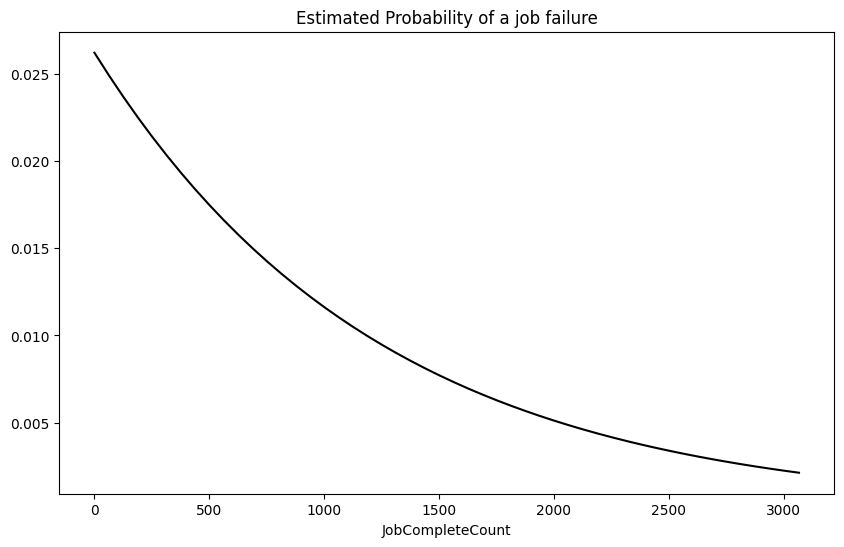

In [263]:
fit_df = pd.DataFrame({
    'JobCompleteCount': np.linspace(start = larger_ce_acre_merge_df['JobCompleteCount'].min(),
                            stop = larger_ce_acre_merge_df['JobCompleteCount'].max()
                            )
})

fit_df['fit'] = large_job_fail_log.predict(fit_df)

fit_df.plot(x = 'JobCompleteCount',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of a job failure');